# Predicting Price Used Cars Using Regression

 There are many factors which have an influence on the selling price of a car. Further there are a lot of additional costs depending on the model, the millage, the fuel consumption etc. Usually the older the car is, the less it will be worth. For example, a new car might lose 20-30% of its value in only 1-2 years, but later the diminution might be slower. A car loses less or more value every year depending of its type. Sometimes it can even increase in value.

## Table of content:

- Import Libraries
- Data Exploring
- Data Cleaning
- Data Analysis and Visulizations
- Feature Engneering
- Linear Regression Models
- Conclusion


## Importing libreries:

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rc
import plotly.graph_objs as go
from sklearn import preprocessing
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
#from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
import missingno as msno

In [2]:
#df = pd.read_csv('/Users/reema/Desktop/ML/vehicles.csv')

In [3]:
df = pd.read_csv('/Users/soaadaljafr/Downloads/vehicles.csv')

## EDA
### Data Exploring:

In [4]:
df.sample(6)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
68198,7307746524,https://ventura.craigslist.org/ctd/d/newbury-p...,ventura county,https://ventura.craigslist.org,100,2010.0,toyota,prius,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00E0E_BJ4x43qBAE...,$RENT TO OWN$ CARS starting at $100 Week - $10...,NaN,ca,34.046615,-118.944737,2021-04-16T09:04:27-0700
193622,7316889940,https://annarbor.craigslist.org/ctd/d/brighton...,ann arbor,https://annarbor.craigslist.org,3906,2011.0,ford,escape xls awd! awd,excellent,4 cylinders,...,NaN,SUV,NaN,https://images.craigslist.org/00d0d_6nLwFSKTIN...,2011 Ford Escape XLS AWD! AWD FOR ONLY $62/mo!...,NaN,mi,42.568136,-83.813674,2021-05-04T15:31:30-0400
405819,7307940127,https://moseslake.craigslist.org/ctd/d/spokane...,moses lake,https://moseslake.craigslist.org,431,2022.0,mitsubishi,eclipse cross sel,excellent,4 cylinders,...,NaN,SUV,NaN,https://images.craigslist.org/00v0v_c8464eYsPz...,$431/mo - 2022 Mitsubishi ECLIPSE CROSS SEL - ...,NaN,wa,47.717677,-117.411665,2021-04-16T14:02:29-0700
219512,7314440723,https://columbiamo.craigslist.org/ctd/d/clinto...,columbia / jeff city,https://columbiamo.craigslist.org,40917,2017.0,ram,1500,NaN,NaN,...,NaN,pickup,NaN,https://images.craigslist.org/00p0p_dHpSIJqW8b...,➔ Want to see more pictures?Paste this link to...,NaN,mo,38.382623,-93.773440,2021-04-29T13:36:30-0500
89852,7314671337,https://washingtondc.craigslist.org/nva/ctd/d/...,"washington, DC",https://washingtondc.craigslist.org,22990,2017.0,chrysler,pacifica touring,good,6 cylinders,...,NaN,van,NaN,https://images.craigslist.org/00D0D_db6cnBylgf...,Carvana is the safer way to buy a car During t...,NaN,dc,38.890000,-77.030000,2021-04-29T23:41:06-0400
100878,7316454643,https://lakeland.craigslist.org/ctd/d/lakeland...,lakeland,https://lakeland.craigslist.org,22590,2015.0,hyundai,genesis coupe 3.8 2d,good,6 cylinders,...,NaN,coupe,NaN,https://images.craigslist.org/00000_a4A4uV8C4k...,Carvana is the safer way to buy a car During t...,NaN,fl,28.040000,-81.960000,2021-05-03T17:51:17-0400


## Data Cleaning:

In [5]:
df.isna().sum().to_frame()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


In [6]:
df.drop(['id', 'url','region_url', 'VIN', 'image_url', 'lat', 'long', 'description','county'], axis=1, inplace=True)

In [7]:
df.isnull().sum().to_frame()

,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242


In [8]:
used_cars = df

In [9]:
used_cars.describe(include=["object"]).T

,count,unique,top,freq
region,426880,404,columbus,3608
manufacturer,409234,42,ford,70985
model,421603,29667,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524
drive,296313,3,4wd,131904
size,120519,4,full-size,63465


In [10]:
used_cars.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [11]:
used_cars.model.unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [12]:
used_cars1 = used_cars.dropna()

In [13]:
used_cars1.shape

(79195, 17)

In [14]:
used_cars1 = used_cars1[used_cars1['price']>0]

In [15]:
y = used_cars1['price']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

31        True
55        True
59        True
65        True
73        True
          ... 
426793    True
426808    True
426809    True
426831    True
426833    True
Name: price, Length: 75738, dtype: bool

In [16]:
print(removed_outliers.value_counts())

True     68201
False     7537
Name: price, dtype: int64


In [17]:
index_names = used_cars1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names)

Int64Index([   260,    339,    342,    346,    365,    410,    413,    439,
               482,    535,
            ...
            426745, 426766, 426767, 426769, 426770, 426773, 426774, 426775,
            426776, 426778],
           dtype='int64', length=7537)


In [18]:
used_cars1.drop(index_names, inplace=True)

In [19]:
used_cars1 = used_cars1[['price','condition','region','year','manufacturer','model','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','state']]



## Data Analysis and Visulizations

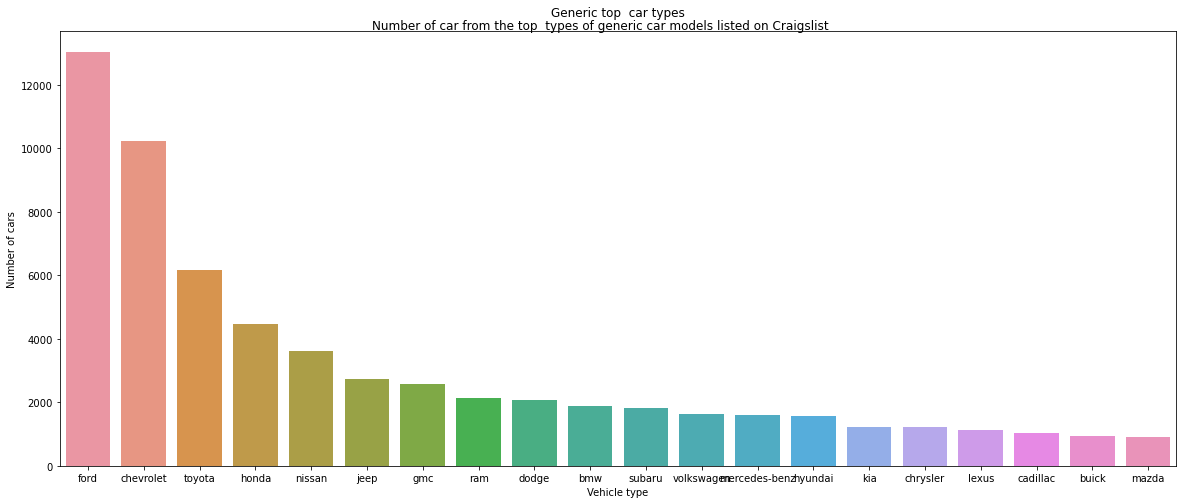

In [20]:
top_manufacturers = used_cars1.manufacturer.value_counts(dropna=False).iloc[:20]


plt.figure(figsize=(20,8))
sns.barplot(x=top_manufacturers.index,y=top_manufacturers.values)
plt.xlabel('Vehicle type')
plt.ylabel('Number of cars')
plt.title('Generic top  car types',y=1.02)
plt.suptitle('Number of car from the top  types of generic car models listed on Craigslist',y=0.9);

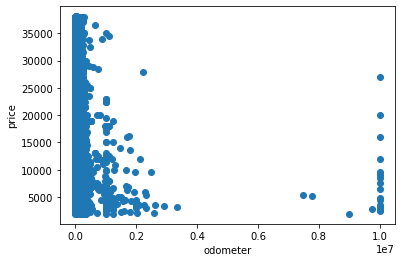

In [21]:
y = used_cars1['price']
x = used_cars1['odometer']
plt.scatter(x, y)
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

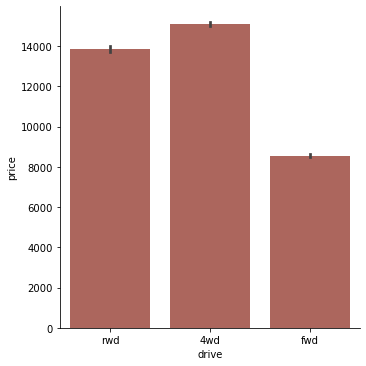

In [23]:
sns.catplot(x="drive", y="price",kind="bar",color="#B95C50", data=used_cars1)

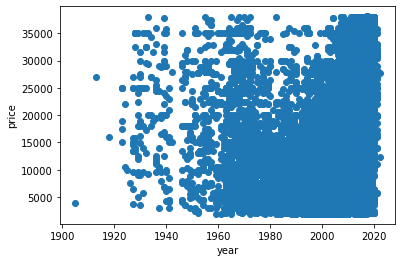

In [24]:
y = used_cars1['price']
x = used_cars1['year']
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

In [25]:
le = preprocessing.LabelEncoder()

In [26]:
used_cars1[['region','condition','manufacturer','model','cylinders','fuel','title_status','transmission','drive'
,'type','paint_color','state']] = used_cars1[['region','condition','manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color','state']].apply(le.fit_transform)



In [27]:
from sklearn.preprocessing import MinMaxScaler
used_cars1["odometer"] = np.sqrt(preprocessing.minmax_scale(used_cars1["odometer"]))

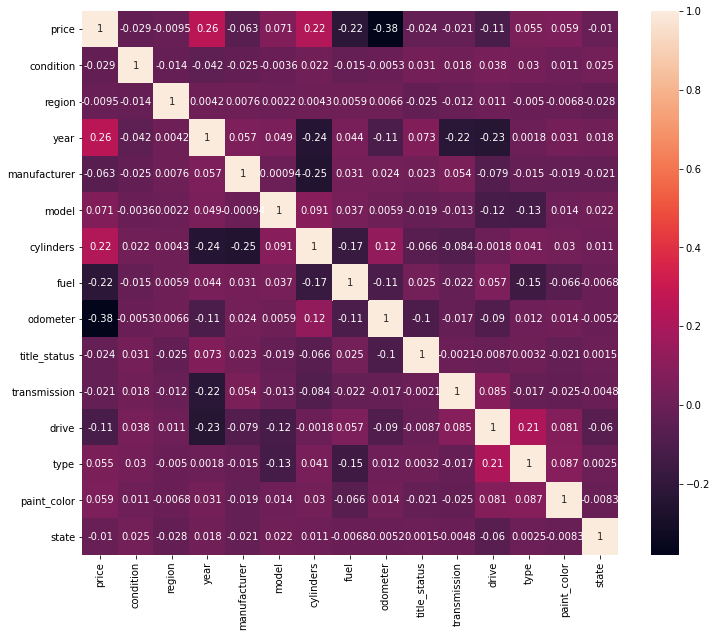

In [28]:
plt.figure(figsize=(12,10))
cor = used_cars1.corr()
sns.heatmap(cor, annot=True)
plt.show()

## Feature Engneering

In [29]:
seed=60
df_train, df_test= train_test_split(used_cars1, test_size=0.2, random_state=seed)
df_train, df_val= train_test_split(df_train, test_size=0.2, random_state=seed)
df_train.head()

,price,condition,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
393024,3900,2,235,2007.0,15,4015,3,2,0.143213,0,0,1,4,1,45
171827,30000,2,190,2018.0,12,3462,6,2,0.075498,4,0,0,10,9,17
104360,7350,0,258,1999.0,7,1938,3,2,0.067454,0,0,1,2,8,9
155209,7995,0,319,2011.0,12,3239,5,2,0.109722,0,0,0,0,9,15
346365,6000,2,65,2014.0,10,4522,5,2,0.094868,4,0,1,5,3,40


In [30]:
X_train1 = df_train.drop(['price'], axis = 1)
y_tran1 = df_train['price']

In [31]:
X_val1 = df_val.drop(['price'], axis = 1)
y_val1 = df_val['price']

In [32]:
X_test1 = df_test.drop(['price'], axis = 1)
y_test1 = df_test['price']

## Linear Regression Models

In [33]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False, interaction_only=False) 
X_train1_poly = poly.fit_transform(X_train1.values)
poly_model = LinearRegression()

In [34]:
poly_model.fit(X_train1_poly, y_tran1)
print(poly_model.score(X_train1_poly, y_tran1))

0.8017059754599882


In [35]:
poly = PolynomialFeatures(degree=5, include_bias=False, interaction_only=False) 
X_val1_poly = poly.fit_transform(X_val1.values)
poly_model = LinearRegression()

In [36]:
poly_model.fit(X_val1_poly, y_val1)
print(poly_model.score(X_val1_poly, y_val1))

0.875078123784791


In [37]:
poly = PolynomialFeatures(degree=5, include_bias=False, interaction_only=False) 
X_test1_poly = poly.fit_transform(X_test1.values)
poly_model = LinearRegression()

In [38]:
poly_model.fit(X_test1_poly, y_test1)
print(poly_model.score(X_test1_poly, y_test1))

0.8451278302886208


In [39]:
lr = LinearRegression()
lr.fit(X_train1,y_tran1)

print(f"Training Score: {lr.score(X_train1,y_tran1)}")

Training Score: 0.3774940304276083


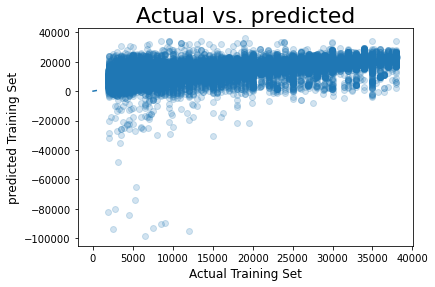

In [40]:
y_tran1_pred = lr.predict(X_train1)

plt.scatter(y_tran1, y_tran1_pred, alpha=0.2)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

In [41]:
lr = LinearRegression()
lr.fit(X_val1,y_val1)

print(f"Training Score: {lr.score(X_val1,y_val1)}")

Training Score: 0.35875379794470774


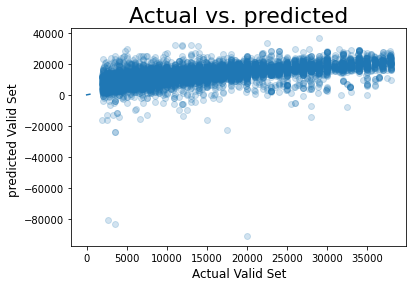

In [42]:
y_val1_pred = lr.predict(X_val1)#cross valid do train only 

plt.scatter(y_val1, y_val1_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Valid Set', size=12)
plt.ylabel('predicted Valid Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

In [43]:
lr = LinearRegression()
lr.fit(X_test1,y_test1)

print(f"Training Score: {lr.score(X_test1,y_test1)}")

Training Score: 0.33928735949006605


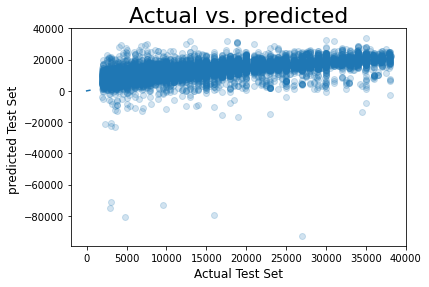

In [44]:
y_test1_pred = lr.predict(X_test1)#cross valid do train only 

plt.scatter(y_test1, y_test1_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Test Set', size=12)
plt.ylabel('predicted Test Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [46]:
abmodel = AdaBoostRegressor()
abmodel.fit(X_train1 , y_tran1)
print(abmodel.score(X_train1 , y_tran1))

0.4822158706241272


In [47]:
abmodel = AdaBoostRegressor()
abmodel.fit(X_val1 , y_val1)
print(abmodel.score(X_val1 , y_val1))

0.4858000931663581


## Ridg

In [48]:
scaler = StandardScaler()

X_train1_scaled = scaler.fit_transform(X_train1.values)
#X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [49]:
red_model.fit(X_train1_scaled, y_tran1)

#print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_train1_scaled, y_tran1):.8f}')

Ridge Regression Training Score: 0.37749403


In [50]:
scaler = StandardScaler()

X_val1_scaled = scaler.fit_transform(X_val1.values)
#X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [51]:
red_model.fit(X_val1_scaled, y_val1)

#print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_val1_scaled, y_val1):.8f}')

Ridge Regression Training Score: 0.35875379


## Conclusion

- Polynomial Regression of Degree 5 algorithm has the best results.
- Linear Regression, Ridge Regression, with Validation has similar scores.